### <font color = red> *** FILL HERE *** </font>
Juhamatti Vasamaa <br>
23.11.2021  <br>

# Data Analysis and Knowledge Discovery: Exercise 3, Supervised learning

This is the template for the third exercise. The idea of this exercise is to apply supervised learning to predict the ship type using certain attributes (speed, destination harbour...) and a K nearest neighbors (kNN) classifier.

### General guidance for exercises 

- Answer **all** questions below, even if you can't get your script to fully work
- Write clear and easily readable code, include explanations what your code does
- Make informative illustrations: include labels for x and y axes, legends and captions for your plots
- Before saving the ipynb file (and possible printing) run: "Restart & Run all", to make sure you return a file that works as expected.
- Grading: *Fail*/*Pass*/*Pass with honors* (+1)
- +1 bonus point (grading *Pass with honors*) requires a **completely** correct solution and also thorough analysis. 
- If you encounter problems, Google first. If you can't find an answer to the problem, don't hesitate to ask in the Moodle discussion or directly via moodle chat or email from the course assistant responsible for the exercise, Valtteri Nieminen, vajnie@utu.fi <font color = red></font>
- Note! Don't leave it to the last moment! No feedback service during weekends.
- The deadline is <font color = red> on 6.12, 19:00</font>
- Using the colors for titles in markdown makes the document more readable and easier to check. 

- This excercise is a bit more freeform than the last one and you don't have to stick to only the cells that are already in the notebook - you can make more if you need to, but it is advisable to comment on new cells what the cell is related to. 
- There are also added summaries of whats included inthe subparts of exercises  just to help you get a better picture of what is required. You will still answer these excercises under their own titles.

### Gather **all** packages needed for this notebook here:
- you can use other packages as well, but this excercise can be completed with those below

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math as math
import sklearn as sklearn
import random as random
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import LeaveOneOut, RepeatedKFold

________
## <font color = dimgrey> Data import </font> 


In [ ]:
data_path = "https://raw.githubusercontent.com/vajnie/DADK_2021/main/shipdata_2021.csv"

In [ ]:
#Import the data here
data = pd.read_csv(data_path) #data is presumed to be in the same folder. 
data

,MMSI,Speed,COG,Destination,Ship_type,Gross_tonnage,Length,Breadth
0,212209000,10.1377,64.3074,Hamina,Cargo,3416,94.91,15.34
1,212436000,13.5256,77.0755,Hamina,Tanker,6280,116.90,18.00
2,219082000,9.9416,74.6762,Hamina,Tanker,9980,141.20,21.90
3,219083000,11.6038,74.7529,Hamina,Tanker,9980,141.20,21.60
4,219426000,11.9203,56.3253,Hamina,Tanker,3219,99.90,15.00
...,...,...,...,...,...,...,...,...
129,273374820,10.0396,74.6253,Vysotsk,Tanker,4979,139.90,16.70
130,273385070,9.3507,74.5454,Vysotsk,Tanker,4979,139.90,16.94
131,273388150,9.7668,68.7159,Vysotsk,Tanker,5075,140.85,16.86
132,636092755,11.1554,73.7013,Vysotsk,Tanker,23240,183.00,27.37


_______________
## <font color = dimgrey> 1) Data preprocessing
Below are all the questions related to this topic, but you should put them under their own respective titles that are found below.

- a) First, find out how many different destinations there are in the data. Do you need to make any preprocessing? **1p** <br>
- b) Destination harbor is a categorical variable. It needs to be converted into a numerical representation. Explain, why do you need to make this step? You can use get_dummies from pandas to implement one-hot coding for categorical features **1p**

- c) Plot Gross tonnage versus the ship Length. Use different colors for different ship types. According to the plot, there is one <b> clear outlier. </b>  Correct the outlying value by changing it to the value 326 and rerun the plot after you have made the correction. **1p**
- d) It is good to exploit domain knowledge and make some reasonable transformation to the feature values to improve the expected results and/or to avoid redundancy. Find out what gross tonnage means. Make some transformation to Length values to acquire a linear relationship between the transformed length and Gross tonnage values. You can find the needed information  https://en.wikipedia.org/wiki/Gross_tonnage. Look at the formula and think how you can get the two variables similarly scaled. If you are having trouble, just experiment with different transformations before asking help. By plotting you can see what the relationship looks like after a transformation you have tried **1p**
- e) The numerical variables have quite different ranges. To ensure that all variables can have the same importance on the model, perform Z-score standardization. Perform it for speed, the ***transformed length*** variable, and breadth **1p**
_______________________

#### <font color = dimgrey> a) Find out how many different destinations there are in the data. Are there any mistakes and do you need to do any preprocessing? Give your code and answer below **1p** </font>

In [ ]:
df = pd.DataFrame(data) #make pandas dataframe
print(f'Destinations harbors:\n{df.Destination.unique()}') #print unique values from destination column

#check how many rows of data we are dealing with 
sillamae = df[df['Destination'] == 'Sillamae']
sillamäe = df[df['Destination'] == 'Sillamäe']
print(f'One row: \n {sillamae} \n Two rows: \n{sillamäe}')

#rename row 78 to 'Sillamäe'
df = df.replace(df['Destination'][78],'Sillamäe')
sillamäe = df[df['Destination'] == 'Sillamäe']
print(f' All rows named as "Sillamäe": \n {sillamäe}')

Destinations harbors:
['Hamina' 'Helsinki' 'Kotka' 'Kronshtadt' 'Kunda' 'Muuga' 'Paldiski'
 'Porvoo' 'Primorsk' 'Sillamäe' 'Sillamae' 'Tallinn' 'Ust-Luga'
 'Valko-Loviisa' 'Viipuri' 'Vuosaari' 'Vysotsk']
One row: 
          MMSI    Speed      COG  ... Gross_tonnage Length  Breadth
78  374538000  10.0683  94.5346  ...          6354  108.5     18.6

[1 rows x 8 columns] 
 Two rows: 
         MMSI    Speed      COG  ... Gross_tonnage  Length  Breadth
76  248792000  11.4175  71.6657  ...          2627   92.86     14.1
77  353566000  12.4437  80.1423  ...         17712  169.90     25.4

[2 rows x 8 columns]
 All rows named as "Sillamäe": 
          MMSI    Speed      COG  ... Gross_tonnage  Length  Breadth
76  248792000  11.4175  71.6657  ...          2627   92.86     14.1
77  353566000  12.4437  80.1423  ...         17712  169.90     25.4
78  374538000  10.0683  94.5346  ...          6354  108.50     18.6

[3 rows x 8 columns]


<font color = red>As we can see, there are 16 destinations because there is one mistake which is destination harbor 'Sillamae' or 'Sillamäe' which way one prefers. One have basically two options: one, one can drop either or both harbors. Two, rename one or the other same as the other harbor. Preferdable way is ofcourse the first one because it's good to preserve data as much as possible but in this case this concerns only three (3) rows of data so one could drop that 'Sillamae' row and it will not affect later prediction too much. Still I did rename the 'Sillamae' row to 'Sillamäe' as we can see from the above code.

____________
#### <font color = dimgrey> b) Destination harbor is a categorical variable. It needs to be somehow converted into a numerical expression. Explain, why do you need to make this step? 
You can use get_dummies from pandas to implement onehot coding for categorical features **1p**

In [ ]:
df = pd.get_dummies(df,columns=['Destination'],dtype=int) #turns destination column values to binary values 0=False or 1=True
df

,MMSI,Speed,COG,Ship_type,Gross_tonnage,Length,Breadth,Destination_Hamina,Destination_Helsinki,Destination_Kotka,Destination_Kronshtadt,Destination_Kunda,Destination_Muuga,Destination_Paldiski,Destination_Porvoo,Destination_Primorsk,Destination_Sillamäe,Destination_Tallinn,Destination_Ust-Luga,Destination_Valko-Loviisa,Destination_Viipuri,Destination_Vuosaari,Destination_Vysotsk
0,212209000,10.1377,64.3074,Cargo,3416,94.91,15.34,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,212436000,13.5256,77.0755,Tanker,6280,116.90,18.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,219082000,9.9416,74.6762,Tanker,9980,141.20,21.90,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,219083000,11.6038,74.7529,Tanker,9980,141.20,21.60,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,219426000,11.9203,56.3253,Tanker,3219,99.90,15.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,273374820,10.0396,74.6253,Tanker,4979,139.90,16.70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
130,273385070,9.3507,74.5454,Tanker,4979,139.90,16.94,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
131,273388150,9.7668,68.7159,Tanker,5075,140.85,16.86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
132,636092755,11.1554,73.7013,Tanker,23240,183.00,27.37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


<font color = red>We need to convert destination varible from text to numerical type because the machine learning algorithms prefers numerical type over text i.e it's easier to and faster to handle.

_______________
####  <font color = dimgrey> c) Plot Gross tonnage versus the ship Length. 

- Use different colors for different ship types. According to the plot, there is one <b> clear </b> outlier. <b> Correct the outlying value by changing it to the value 326 </b> and rerun the plot after you have made the correction. **1p**
- If you want to do things very nicely you could wrap the plotting in a function so you don't paste the same code twice, but this is not required.

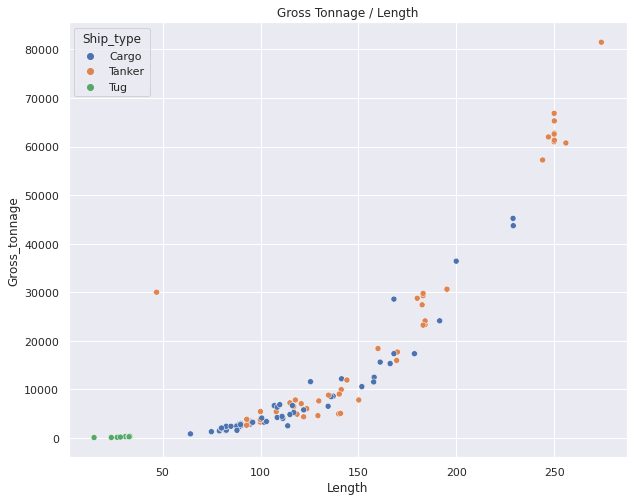

In [ ]:

def plot(x,y,hue):
  #plot with different colors for ship_type, hue attribute shows ship_type and different colors for them
  sns.set()
  plt.figure(figsize=[10,8]) #plot size
  sns.scatterplot(x=x,y=y,hue=hue)
  plt.title('Gross Tonnage / Length') #plot title

plot(df.Length,df.Gross_tonnage,df.Ship_type) #plot with outlier

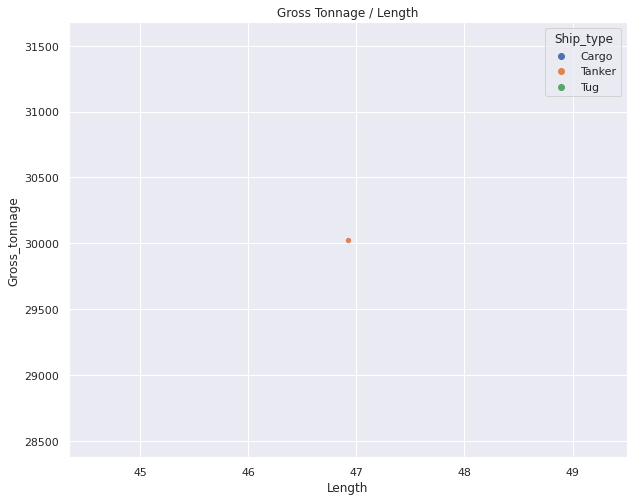

In [ ]:
numeric_df = pd.DataFrame(data=df, columns=['Gross_tonnage','Length'])
outlier = pd.DataFrame(numeric_df.loc[(numeric_df.Length < 50.0) & (numeric_df.Length > 40.0)]) #outlier found
plot(outlier.Length,outlier.Gross_tonnage,df.Ship_type) #plotting outlier

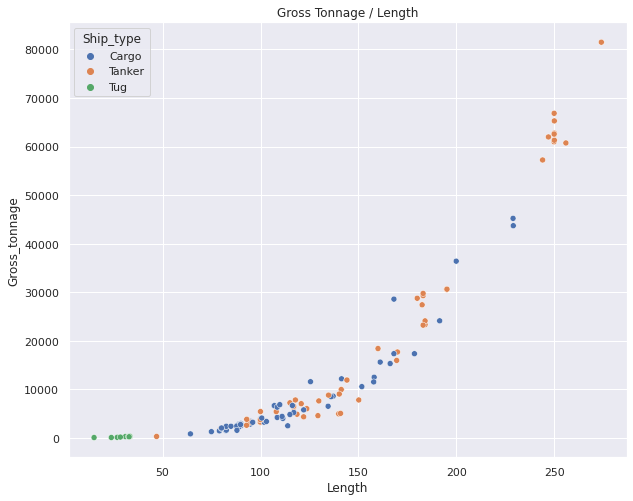

In [ ]:
#corrected outliers length value to 326 as asked
numeric_df = numeric_df.replace(to_replace=outlier.Gross_tonnage.values,value=326)
#plotted with the correction
plot(numeric_df.Length,numeric_df.Gross_tonnage,df.Ship_type)

#### <font color = dimgrey> d) Exploit your domain knowledge and transform to improve the expected results and/or to avoid redundancy. 
- Find out what gross tonnage means. Make some transformation to Length values to acquire a linear relationship between the transformed length and Gross tonnage values. Plot the situation after the transformation **1p** 
- You can find the needed information in for example https://en.wikipedia.org/wiki/Gross_tonnage. Look at the formula and think how you can get the two variables similarly scaled. If you are having trouble, just experiment with different transformations before asking help. By plotting you can see what the relationship looks like after a transformation you have tried
  

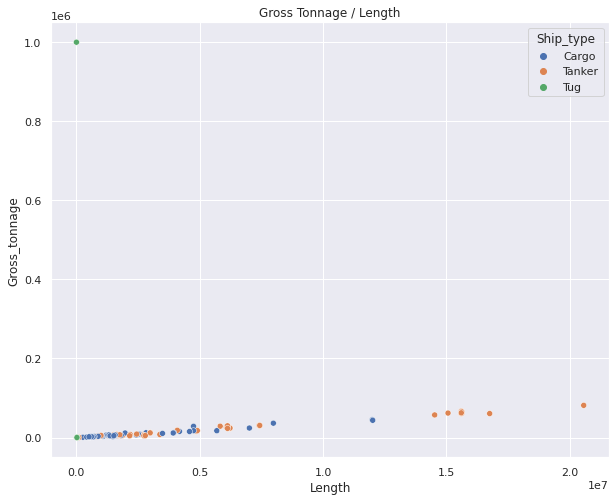

In [ ]:
#tranformed length from meters to cubic meters
cubic_length = numeric_df.replace(to_replace=numeric_df.Length.values,value=(numeric_df.Length.values ** 3))
#plot function
plot(cubic_length.Length,cubic_length.Gross_tonnage,df.Ship_type)

<font color = red>Gross tonnage describes ships volume i.e. how much there is space in every corner of the ship. I transformed length variable from meters to cubic meters because gross tonnage calculation uses cubic meters and not meters. It's useful because now we can compare our two variables better.

#### <font color = dimgrey> e) The numerical variables have quite different ranges. To ensure that all variables can have the same importance on the model, perform Z-score standardization. Perform it for speed, transformed length, and breadth **1p**

In [ ]:
#combining variables as one dataframe
length = pd.DataFrame(cubic_length.Length, columns=['Length'])
speed_breadth = pd.DataFrame(df.iloc[:,[1,6]])
concat_vars = pd.concat([length,speed_breadth],axis=1)

#Z-score standardization
scaler = StandardScaler() #calling scaler
scaler.fit(concat_vars) #fitting the variable values
standard_values = scaler.transform(concat_vars) #transformation or standardization of variable values
new_df = pd.DataFrame(standard_values,columns=['Length','Speed','Breadth'])
new_df

,Length,Speed,Breadth
0,-0.569303,-0.161299,-0.489104
1,-0.405892,1.580209,-0.220696
2,-0.137933,-0.262102,0.172834
3,-0.137933,0.592331,0.142563
4,-0.538041,0.755024,-0.523412
...,...,...,...
129,-0.154887,-0.211726,-0.351873
130,-0.154887,-0.565847,-0.327656
131,-0.142528,-0.351956,-0.335728
132,0.591202,0.361837,0.724786


______________
## <font color = lightcoral>2. Classification </font> 

Predict the **ship type** using **speed, destination, transformed length, and breadth** as features. Find an estimation for the classification accuracy (number of correctly classified ships to the total number of ships) using **random training and test sets**. <br>

Below is a summary of exercises for part 2
- a) Produce training and test data **1p**
     - Gather the normalized features and one-hot-coded destination columns as array __X__ (input variables), and the ship type as array **y** (output variable)     
     - Divide the data randomly into training (20%) and test (80%) sets
     - Do you need to use stratification? **Explain your decision**
- b) Train the model and test its performance **1p**
     - Use kNN classifier with k=3
     - Print out the confusion matrix. How does the model perform with different ship types?
     - What is the (total) classification accuracy?
 - Repeat the calculation 1000 times with different split of training/test data, and make a histogram of the results for classification accuracy **1p**
 - Discuss your results **1p**
 
 ______________

#### <font color = lightcoral> a) Produce training and test data 1p
- Gather the normalized features and one-hot-coded destination columns as array X (input variables), and the ship type as array y (output variable)
- Divide the data randomly into training (20%) and test (80%) sets
- Do you need to use stratification? **Explain your decision**

In [ ]:
### Code for 2a

#Data to X and y variables
X,y = pd.concat([new_df,df.iloc[:,7:23]], axis=1), df.Ship_type

#splitting dataset to training and test sets
#will produce everytime random sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, stratify=y) 
y_train.value_counts(),y_test.value_counts()

(Cargo     54
 Tanker    46
 Tug        7
 Name: Ship_type, dtype: int64, Cargo     13
 Tanker    12
 Tug        2
 Name: Ship_type, dtype: int64)

<font color = red>Yes and no, we might have to do y-axis stratification because after some research I found out that if we do not do that, random sampling might fully drop ship type Tug from the sets so if that were to happen, then the prediction would not be accurate, but the propability for that not any Tug ship type values to appear in y_test is quite low. After testing model in section b) many times again and again, Tug ship type always was in y_test. Still, I did the stratification for the model, because I thought that it will make the prediction still more accurate. As we can see from the above code snippet that stratify=y.

_______________
#### <font color = lightcoral> b) Train the model and test its performance 1p
- Use a kNN classifier with k=3
- Print out the confusion matrix. <br>
- How does the model perform with different ship types? Where do you think the differences come from?<br>
- What is the (total) classification accuracy?

In [ ]:
scaler.fit(X_train) #fit training data

#transforming train and test data for the model
X_test = scaler.transform(X_test) 
X_train = scaler.transform(X_train)

#create classifier with the k value 3 and fit the training data in the classifier
clasf = KNeighborsClassifier(n_neighbors=3)
clasf.fit(X_train,y_train)

#prediction
y_pred = clasf.predict(X_test)


#printing first classification report so that we can see relevant data 
#how prediction went and second the asked matrix
print(metrics.classification_report(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

       Cargo       0.71      0.77      0.74        13
      Tanker       0.77      0.83      0.80        12
         Tug       0.00      0.00      0.00         2

    accuracy                           0.74        27
   macro avg       0.49      0.53      0.51        27
weighted avg       0.69      0.74      0.71        27

[[10  3  0]
 [ 2 10  0]
 [ 2  0  0]]
0.7407407407407407


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy score after 1000 runs: 0.7777777777777778
---------------------------------------------------------------------


Text(0.5, 0, 'Accuracy Distribution')

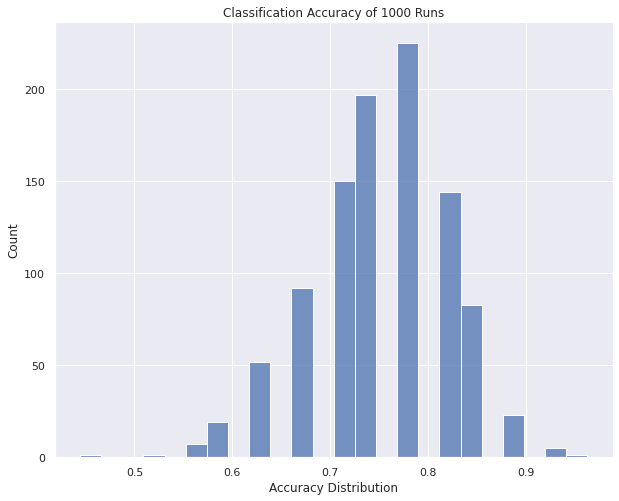

In [ ]:
repeats = 1000
results = []
for x in range(repeats):
  #loop repeats the prediction 1000 times

  #Data to X and y variables
  X,y = pd.concat([new_df,df.iloc[:,7:23]], axis=1), df.Ship_type

  #splitting dataset to training and test sets
  #will produce everytime random sets
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, stratify=y) 

  scaler.fit(X_train) #fit training data

  #transforming train and test data for the model
  X_test = scaler.transform(X_test) 
  X_train = scaler.transform(X_train)

  #create classifier with the k value 3 and fit the training data in the classifier
  clasf = KNeighborsClassifier(n_neighbors=3)
  clasf.fit(X_train,y_train)

  #prediction
  y_pred = clasf.predict(X_test)
  
  #prints accauracy scores
  a_scores = metrics.accuracy_score(y_test,y_pred)
  results.append(a_scores)

print(f'Accuracy score after 1000 runs: {metrics.accuracy_score(y_test,y_pred)}')

print('---------------------------------------------------------------------')

#Plot the 1000 runs

plt.figure(figsize=[10,8])
sns.histplot(data=results)
plt.title('Classification Accuracy of 1000 Runs')
plt.xlabel('Accuracy Distribution')

<font color = red>The model performs actually pretty good with the Cargo and Tanker ship types but not with the Tug ship type and I think the reason for this is that Tug ship type has much less samples if we compare it with two other ship types. 
What comes to the total accuracy (mean), we can see the value above histogram, it's almost 74% and distribution shows that most of the runs got the accuracy somewhere between 70 to 78% (this can also be seen by running KNN classifier script multiple times that the "new accuracy value" will place somewhere between the range seen in histogram) which we can see from that mean too. After 1000 runs usually the final result is more accurate than after running it just ones. 
I think the most relevant is the prediction accuracy and weighted avg. After some thinking I came to think that we might get better results from the model if we would split the test and train data more evenly, maybe 60/40 or 50/50 and not 80/20 because the dataset is so small or we could split the training and test data evenly. That way we could get more test data and more accurate predictions.

__________
## 3. <font color = navy> Classification accuracy using leave-one-out cross validation

Again, predict the **ship type** using **speed, destination, transformed length, and breadth** of the ship as features. Find an estimation for the classification accuracy using *leave-one-out cross validation (LOO CV)*. <br>

 - a) Use leave-one-out cross validation to estimate the model performance **1p**
     - Use kNN classifier with k=3
     - What is the classification accuracy? Compare the result with the one you got in the previous task
 - b) Which method gives better evaluation of the performance of the classifier with this data set? Explain your choice **1p**

In [ ]:

#Data to X and y variables
X,y = pd.concat([new_df,df.iloc[:,7:23]], axis=1), df.Ship_type

#splitting dataset to training and test sets
#will produce everytime random sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, stratify=y)

scaler.fit(X_train) #fit training data

#transforming train and test data for the model
X_test = scaler.transform(X_test) 
X_train = scaler.transform(X_train)

#create classifier with the k value 3 and fit the training data in the classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

#prediction
y_pred = knn.predict(X_test)

print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       Cargo       0.71      0.77      0.74        13
      Tanker       1.00      0.83      0.91        12
         Tug       0.00      0.00      0.00         2

    accuracy                           0.74        27
   macro avg       0.57      0.53      0.55        27
weighted avg       0.79      0.74      0.76        27



In [ ]:
#After some research I found out that one could estimate
#classification accuracy using cross_val_score where one
#can use LeaveOneOut() as a parameter and knn as well
#without needing to create for loop for that
#if we were to create for loop, it would give same estimate/score
#than below function
#Credits for this goes here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html?highlight=cross_val#sklearn.model_selection.cross_val_score

#Cross-validation using LeaveOneOut()
loo = LeaveOneOut()
scores = cross_val_score(knn,X,y,scoring='accuracy',cv=loo)
print(f'LOOCV accuracy: {scores.mean()}')

LOOCV accuracy: 0.746268656716418


#### a) <font color = navy> What is the classification accuracy? Compare the result with the one you got in the previous task **1p**

<font color = red> The classification accuracy (LOOCV) is about 75% as we can see from the above code snippet. If we compare this result with previous tasks result we can see that the result is little bit better than the one time run accuracy usually is but it seems that if we train the model with the 1000 runs then it seems to be more accurate than with LOOCV. </font>
    
#### b) <font color = navy>  Which method gives better evaluation of the performance of the classifier with this data set? Why? 1p

<font color = red> The basic knn gives better results but only when it's trained many many times to get better i.e. 1000 runs. LOOCV though gives better single result because it's basically using cross validation which iterates through dataset by testing each entity of training set one by one and this makes it more better result wise than just basic knn. 

____________
## <font color = forestgreen> 4. Model selection with leave-one-out cross validation

- a) Select the best model (kNN with selection of k) using leave-one-out cross validation (Repeat the model performance estimation with values k=1...30). Which value of k produces the best classification accuracy? **2p**
- b) If the number of k is still increased, what is the limit that the **1p** classification accuracy approaches? Why?
- d) Can you say something about the performance of this *selected* model with new, unseen data? Explain, how you could you estimate the performance of this selected model. **1p** 

In [ ]:

best_result = []
scores2 = []
for x in range(1,31):
#Data to X and y variables
  X,y = pd.concat([new_df,df.iloc[:,7:23]], axis=1), df.Ship_type

  #create classifier with the k value 3 and fit the training data in the classifier
  knn = KNeighborsClassifier(n_neighbors=x)
  knn.fit(X_train,y_train)
  
  #cross validator
  loo = LeaveOneOut()
  scores = cross_val_score(knn,X,y,scoring='accuracy',cv=loo)

  #score values to the list for the later plot
  scores2.append(scores.mean().max())
  
  #lists accuracy scores between k values 1-30
  best_result.append({x:scores.mean().max()})
  
  #finds max values from above scores
  k_values = [max(dict.items()) for dict in best_result] 

#prints best k value + prediction
print(f'Best k value + prediction %: {sorted(k_values,key=lambda x: x[1], reverse=True)[0]}')
print(f'k values 1-30: {k_values}')

Best k value + prediction %: (4, 0.7686567164179104)
k values 1-30: [(1, 0.7164179104477612), (2, 0.7388059701492538), (3, 0.746268656716418), (4, 0.7686567164179104), (5, 0.7388059701492538), (6, 0.746268656716418), (7, 0.753731343283582), (8, 0.7388059701492538), (9, 0.746268656716418), (10, 0.7388059701492538), (11, 0.7388059701492538), (12, 0.7238805970149254), (13, 0.7164179104477612), (14, 0.7089552238805971), (15, 0.7238805970149254), (16, 0.7238805970149254), (17, 0.7014925373134329), (18, 0.7164179104477612), (19, 0.7238805970149254), (20, 0.7164179104477612), (21, 0.7164179104477612), (22, 0.7164179104477612), (23, 0.7238805970149254), (24, 0.7238805970149254), (25, 0.7238805970149254), (26, 0.7388059701492538), (27, 0.7313432835820896), (28, 0.7313432835820896), (29, 0.7164179104477612), (30, 0.7089552238805971)]


#### <font color = forestgreen>  a) Which value of k produces the best classification accuracy? **1p**</font>

<font color = red> Best classification accuracy seems to be produced when k value is four (4).

#### <font color = forestgreen> b) If the number of k is still increased, what is the limit that the classification accuracy approaches? Why?

<font color = red> The limit is 0.5 which the classification accuracy approaches because of the sample size. We have 133 observations and if we were to use that as a k value, then accuracy is its lowest with the k value 115 which is about 0.48, after that accuracy stays the same (0.5) till the end of samples. Accuracy becomes less accurate because if the k value gets bigger then number of tests performed will decreace. In a point where accuracy starts stay 0.5 there are only one tested against one which can only give result 0.5. 

#### <font color = forestgreen> c) Can you say something about the performance of this *selected* model with new, unseen data? Explain, how you could you estimate the performance of this selected model. **1p**

<font color = red> knn with LOOCV is good when used with small data but if we have very large dataset the predictions would take forever and that wouldn't be very efficient. We can estimate the performance of this model using the best k value which in our case is four (4) and then repeatedly (for example 1000 times) train the model and see how good it will get, then for example we could print the accuracy, confusion matrix or plot the prediction value curve.

________________
### <font color = red>  5. Testing with training data <font color = red> (this should never be done out of this exercise!) </font>

- Repeat the previous task but use the whole data for training **2p**
- Plot the resulting classification accuracy versus k=1...30. **Include the values from the previous task in the same figure**
- Comment your result. **Why** shouldn't you test with training data?

In [ ]:

best_result = []
lst_scores = []
for x in range(1,31):
#Data to X and y variables
  X,y = pd.concat([new_df,df.iloc[:,7:23]], axis=1), df.Ship_type

  #splitting dataset to training and test sets
  #will produce everytime random sets
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, stratify=y)

  scaler.fit(X_train) #fit training data

  #transforming train and test data for the model
  X_test = scaler.transform(X_test) 
  X_train = scaler.transform(X_train)

  #create classifier with the k value 3 and fit the training data in the classifier
  knn = KNeighborsClassifier(n_neighbors=x)
  knn.fit(X_train,y_train)

  #prediction
  y_pred = knn.predict(X_test)
  
  #lists accuracy scores between k values 1-30
  lst_scores.append(metrics.accuracy_score(y_test,y_pred))
  scores1 = metrics.accuracy_score(y_test,y_pred)
  best_result.append({x:scores1})
  
  #finds max values from above scores
  k_values = [max(dict.items()) for dict in best_result] 

#prints best k value + prediction  
print(f'Best k value + prediction %: {sorted(k_values,key=lambda x: x[1], reverse=True)[0]}')

Best k value + prediction %: (24, 0.8148148148148148)


Text(0.5, 1.0, 'Task 4')

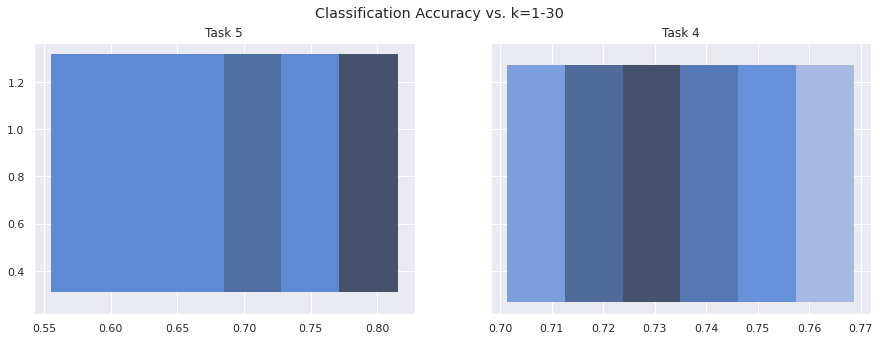

In [ ]:
#Plots for Task 4 and 5. I wasn't sure if I should have made just one plot
#but we can see the point from these two plots also that Task 5 sometimes
#results too optimistic predictions

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Classification Accuracy vs. k=1-30')

# Task 5
sns.histplot(ax=axes[0], x=lst_scores, y=max(lst_scores))
axes[0].set_title('Task 5')

# Task 4
sns.histplot(ax=axes[1], x=scores2, y=max(scores2))
axes[1].set_title('Task 4')

 <font color = red> One shouldn't test with the training dataset because it can lead to overfitting of the data and this leads to too optimistic predictions.

In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('DAKD2021_exercise3.ipynb')

--2021-12-13 05:31:40--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2021-12-13 05:31:40 (36.8 MB/s) - ‘colab_pdf.py’ saved [1864/1864]

Mounted at /content/drive/




Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/DAKD2021_exercise3.ipynb to pdf
[NbConvertApp] Support files will be in DAKD2021_exercise3_files/
[NbConvertApp] Making directory ./DAKD2021_exercise3_files
[NbConvertApp] Making directory ./DAKD2021_exercise3_files
[NbConvertApp] Making directory ./DAKD2021_exercise3_files
[NbC

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'